In [1]:
import os
import sys
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
nx = 1024
ny = 1024

In [3]:
print(nx,ny)

1024 1024


In [4]:
X = np.zeros((nx,ny))
Y = np.zeros((nx,ny))

In [5]:
for i in range(nx):
    X[i,:] = 2.*np.pi*float(i/nx)
    
for j in range(ny):
    Y[:,j] = 2.*np.pi*float(j/ny)

In [6]:
def foo(x,y,lvl):
    taint = 0
    lx = x/(2.*np.pi)
    ly = y/(2.*np.pi)
    for k in range(lvl):
        digx = math.floor(3*lx)
        digy = math.floor(3*ly)
        if (digx==1)&(digy==1):
            return 0
        lx = (3.*lx-digx)
        ly = (3.*ly-digy)
    
    return 1

In [7]:
vfoo = np.vectorize(foo)

In [8]:
chi = vfoo(X,Y,5)

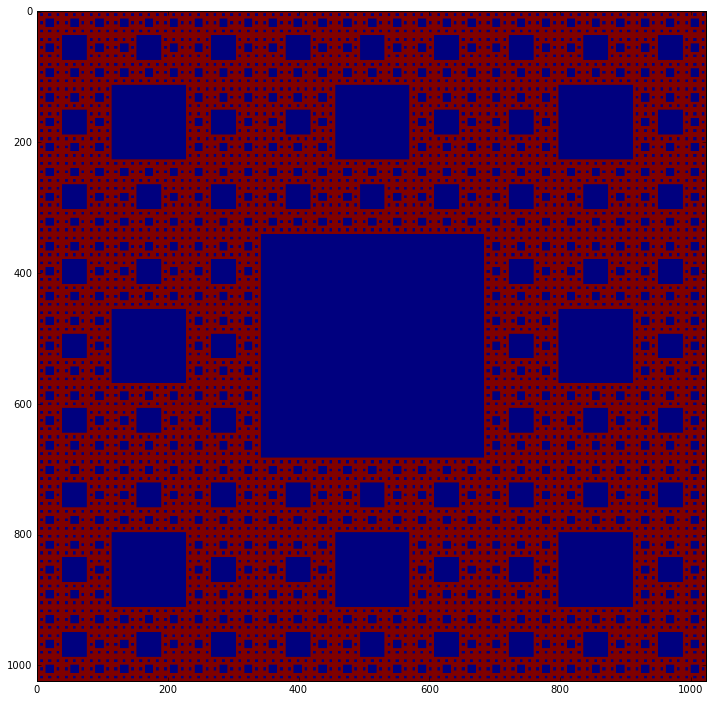

In [9]:
%matplotlib inline

plt.figure(figsize=(12,12))
plt.imshow(chi)

In [10]:
vFrac = np.average(chi)
nchi = (chi/(nx*ny))/vFrac

In [11]:
cchi = np.fft.rfft2(nchi)

In [12]:
tmp = cchi*(cchi.conj())

In [13]:
corr = np.fft.irfft2(tmp)

In [14]:
corr[(nx//2):nx,:] = 0.
corr[:,(ny//2):ny] = 0.

print(corr)

[[  1.71533942e-06   1.63485625e-06   1.55437307e-06 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.63485625e-06   1.56814640e-06   1.50143655e-06 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  1.55437307e-06   1.50143655e-06   1.44850002e-06 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]


In [15]:
r2 = X**2+Y**2
r2rt = np.sqrt(r2)
dx = (2.*np.pi)/nx
ner = int(nx*np.sqrt(3))
rbins = np.linspace(-0.5*dx,2*np.pi*np.sqrt(3)+0.5*dx,ner+1)

In [16]:
rCorr,redges = np.histogram(r2rt,range=(0.5*dx,(ner+0.5)*dx),bins = rbins,weights=corr)

In [17]:
r2,r2edges = np.histogram(r2rt,range=(0.5*dx,(ner+0.5)*dx),bins = rbins)

In [18]:
print(rCorr)

[  1.71533942e-06   4.83785889e-06   6.11161923e-06 ...,   0.00000000e+00
   0.00000000e+00   0.00000000e+00]


In [19]:
print(r2[0:100])

[  1   3   4   5   9   8  11  11  13  18  15  19  18  23  23  22  29  29
  29  30  31  35  36  37  39  41  42  43  45  44  51  49  49  54  57  59
  54  57  63  60  69  61  69  68  67  77  72  81  71  77  80  81  85  82
  83  93  84  93  93  99  94  93  97  98 109 103 101 108 105 111 108 115
 119 115 116 113 131 118 125 121 126 133 129 133 130 133 141 132 145 143
 141 142 141 153 150 151 151 151 156 153]


Sierpinsky carpet : Linear fit [alpha A] = [ 0.93476158  5.00418515]


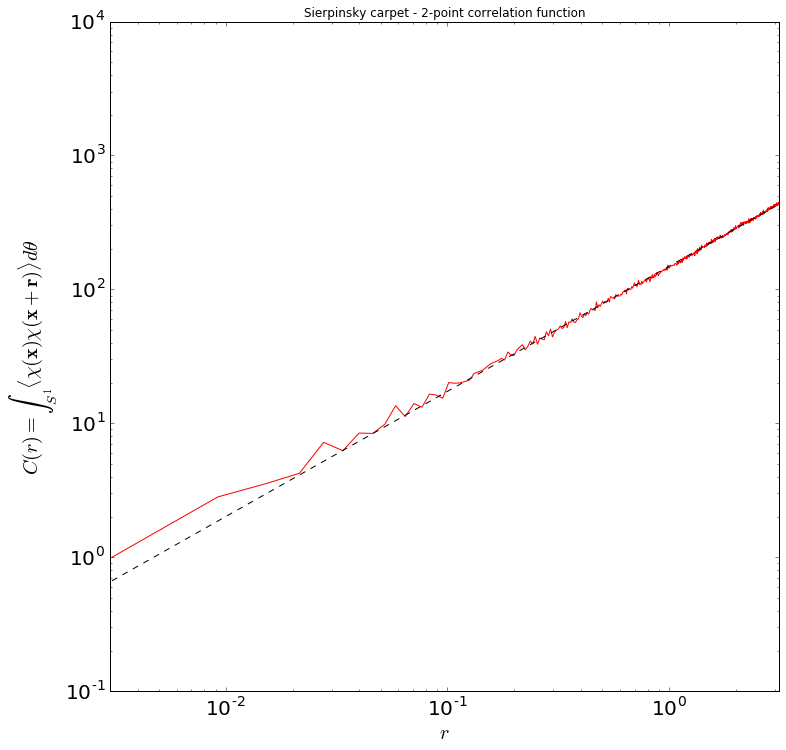

In [22]:
%matplotlib inline

matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20) 

idx = r2>0
rp=np.linspace(0.5*dx,(ner+0.5)*dx,ner)

lrp = rp[idx]

tempRp = lrp[(lrp>0.1)&(lrp<3.0)]

plt.figure(figsize=(12,12))
plt.xlabel(r'$r$', fontsize=20)
plt.ylabel(r'$ C(r) = \int_{S^1} \langle \chi({\bf x}) \chi({\bf x}+{\bf r}) \rangle d\theta$', fontsize=20)

plt.xlim([3.*10**(-3),np.pi])
#plt.ylim([5*10**(-1),10**(0)])

lrCorr = rCorr[idx]
lr2 = r2[idx]

dCorr = lrCorr#/lr2
dCorr = dCorr/dCorr[0]
#dCorr = lrCorr/lr2
#dCorr = dCorr/dCorr[0]

tempCorr = dCorr[(lrp>0.1)&(lrp<3)]

fit = np.polyfit(np.log(tempRp),np.log(tempCorr),1)

print("Sierpinsky carpet : Linear fit [alpha A] = "+str(fit))

ticks = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
labels = [str(s) for s in ticks]
plt.yticks(ticks,labels)

plt.title("Sierpinsky carpet - 2-point correlation function")
plt.loglog(lrp,dCorr,'r')
plt.loglog(lrp,np.exp(fit[1])*(lrp**(fit[0])),'k--')